In [9]:
library(Seurat)
library(ggplot2)
data=readRDS('../../02-Cell_anotation/scRNA_annodata.rds')
#head(data,2)

Loading required package: Rcpp



$Seurat
 [1] "clustree"     "ggraph"       "circlize"     "cowplot"      "kableExtra"  
 [6] "ggrepel"      "ggfortify"    "ggplot2"      "knitr"        "DT"          
[11] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

$dplyr
 [1] "clustree"     "ggraph"       "circlize"     "cowplot"      "kableExtra"  
 [6] "ggrepel"      "ggfortify"    "ggplot2"      "knitr"        "DT"          
[11] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

$DT
 [1] "clustree"     "ggraph"       "circlize"     "cowplot"      "kableExtra"  
 [6] "ggrepel"      "ggfortify"    "ggplot2"      "knitr"        "DT"          
[11] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

$knitr
 [1] "clustree"     "ggraph"       "circlize"     "cowplot"      "kableExtra"  
 [6] "ggrepel"      "ggfortify"    "ggplot2"      "knitr"        "DT"          
[11] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

$ggfortify
 [1] "clustree"     "ggraph"       "circlize"     "cowplot"      "kableExtra"  
 [6] "ggrepel"      "ggfortify"    "ggplot2"      "knitr"        "DT"          
[11] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

$ggrepel
 [1] "clustree"     "ggraph"       "circlize"     "cowplot"      "kableExtra"  
 [6] "ggrepel"      "ggfortify"    "ggplot2"      "knitr"        "DT"          
[11] "dplyr"        "SeuratObject" "Seurat"       "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

$harmony
 [1] "harmony"      "Rcpp"         "clustree"     "ggraph"       "circlize"    
 [6] "cowplot"      "kableExtra"   "ggrepel"      "ggfortify"    "ggplot2"     
[11] "knitr"        "DT"           "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

$kableExtra
 [1] "harmony"      "Rcpp"         "clustree"     "ggraph"       "circlize"    
 [6] "cowplot"      "kableExtra"   "ggrepel"      "ggfortify"    "ggplot2"     
[11] "knitr"        "DT"           "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

$cowplot
 [1] "harmony"      "Rcpp"         "clustree"     "ggraph"       "circlize"    
 [6] "cowplot"      "kableExtra"   "ggrepel"      "ggfortify"    "ggplot2"     
[11] "knitr"        "DT"           "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

$circlize
 [1] "harmony"      "Rcpp"         "clustree"     "ggraph"       "circlize"    
 [6] "cowplot"      "kableExtra"   "ggrepel"      "ggfortify"    "ggplot2"     
[11] "knitr"        "DT"           "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

$ggplot2
 [1] "harmony"      "Rcpp"         "clustree"     "ggraph"       "circlize"    
 [6] "cowplot"      "kableExtra"   "ggrepel"      "ggfortify"    "ggplot2"     
[11] "knitr"        "DT"           "dplyr"        "SeuratObject" "Seurat"      
[16] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[21] "methods"      "base"        

$clustree
 [1] "harmony"      "Rcpp"         "clustree"     "ggraph"       "circlize"    
 [6] "cowplot"      "kableExtra"   "ggrepel"      "ggfortify"    "ggplot2"     
[11] "knitr"        "DT"     

In [19]:
sce=subset(data,idents = c('KC'))
table(sce$group)
table(sce$sample)


  aged middle  young 
 12520   6808   7605 


Skin-M-44 Skin-M-47 Skin-M-48 Skin-O-70 Skin-O-73 Skin-O-76 Skin-Y-18 Skin-Y-22 
     2387      2222      2199      2862      4836      4822      2159      1586 
Skin-Y-23 
     3860 

In [20]:
DefaultAssay(sce) <- "RNA"
scRNAlist=SplitObject(sce,split.by = 'sample')
sce <- merge(scRNAlist[[1]], y=c(scRNAlist[[2]], scRNAlist[[3]], scRNAlist[[4]], scRNAlist[[5]], 
                                           scRNAlist[[6]], scRNAlist[[7]], scRNAlist[[8]], scRNAlist[[9]]))
sce <- NormalizeData(sce)
sce <- FindVariableFeatures(sce, selection.method = 'vst', nfeatures = 2500)
sce <- ScaleData(sce,verbose = FALSE)
sce <- RunPCA(sce,verbose = FALSE) 

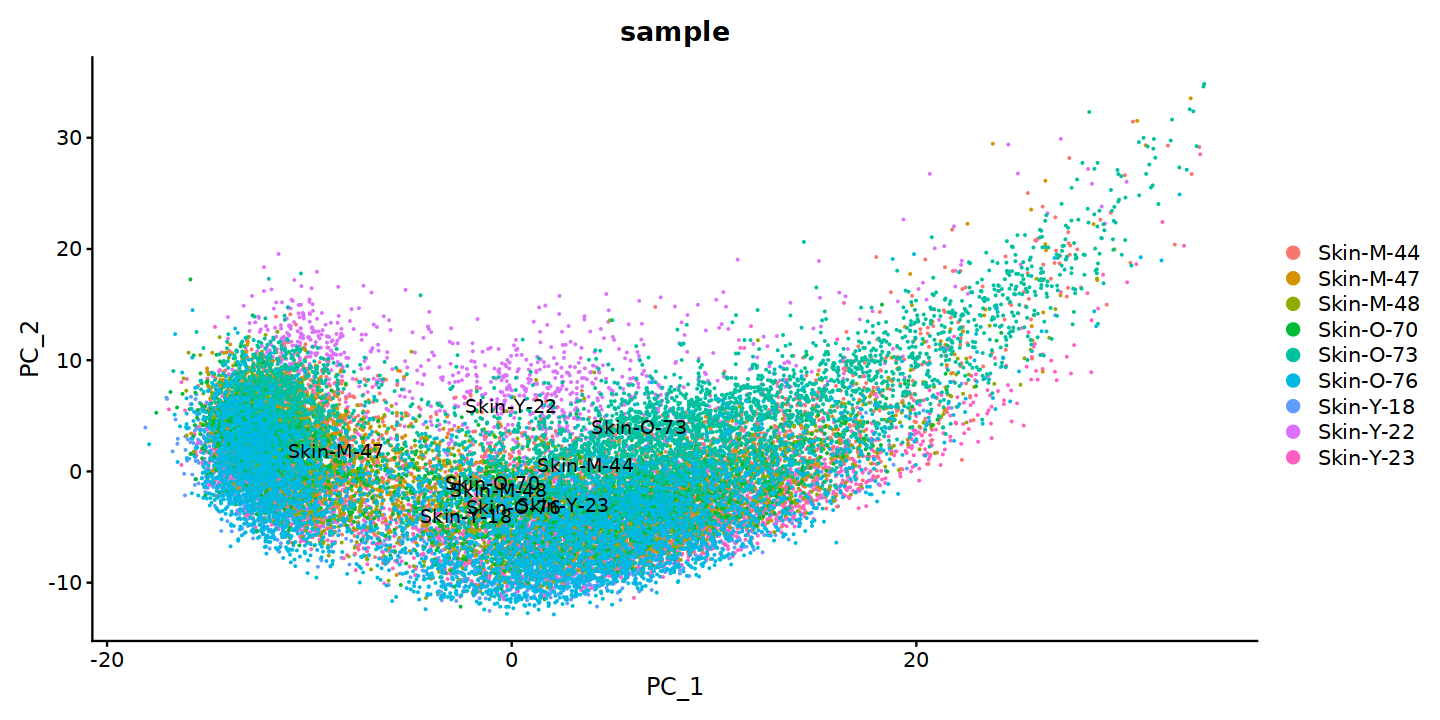

In [21]:
options(repr.plot.width=12, repr.plot.height=6)
DimPlot(object = sce, reduction = "pca", label = TRUE, group.by = "sample")

In [23]:
sce=RunHarmony(sce, group.by.vars = "sample")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [47]:
scRNA.integrated=sce
scRNA.integrated <- RunUMAP(object = scRNA.integrated, reduction = "harmony", dims = 1:19)
scRNA.integrated <- FindNeighbors(scRNA.integrated, reduction = "harmony", dims = 1:19, verbose=FALSE)
scRNA.integrated <- FindClusters(scRNA.integrated, reduction = "harmony", resolution = 2.8)  ##############################?????????????????

10:51:28 UMAP embedding parameters a = 0.9922 b = 1.112

10:51:28 Read 26933 rows and found 19 numeric columns

10:51:28 Using Annoy for neighbor search, n_neighbors = 30

10:51:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:51:31 Writing NN index file to temp file /tmp/Rtmp44a6Y3/fileaca222c14baa

10:51:31 Searching Annoy index using 1 thread, search_k = 3000

10:51:40 Annoy recall = 100%

10:51:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:51:42 Initializing from normalized Laplacian + noise (using irlba)

10:51:44 Commencing optimization for 200 epochs, with 1158140 positive edges

10:52:12 Optimization finished

Warning message:
“The following arguments are not used: reduction”
Warning message:
“The following 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26933
Number of edges: 873830

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7204
Number of communities: 37
Elapsed time: 5 seconds


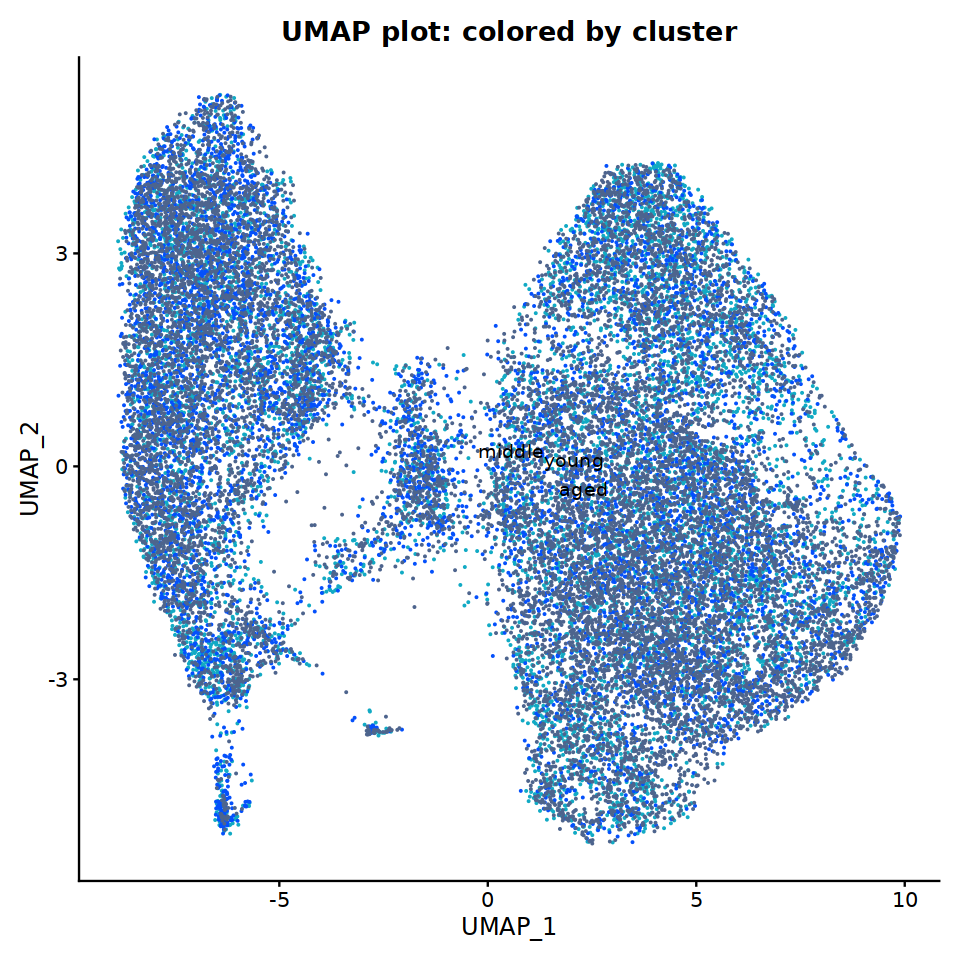

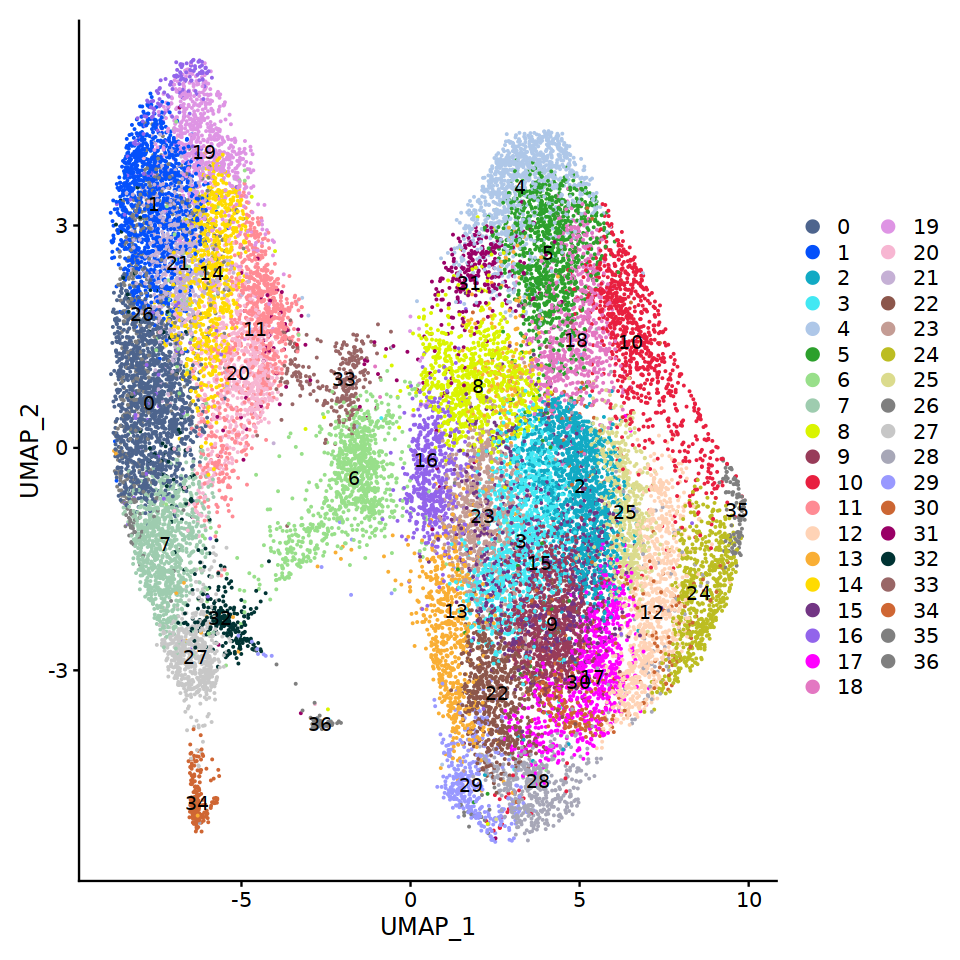

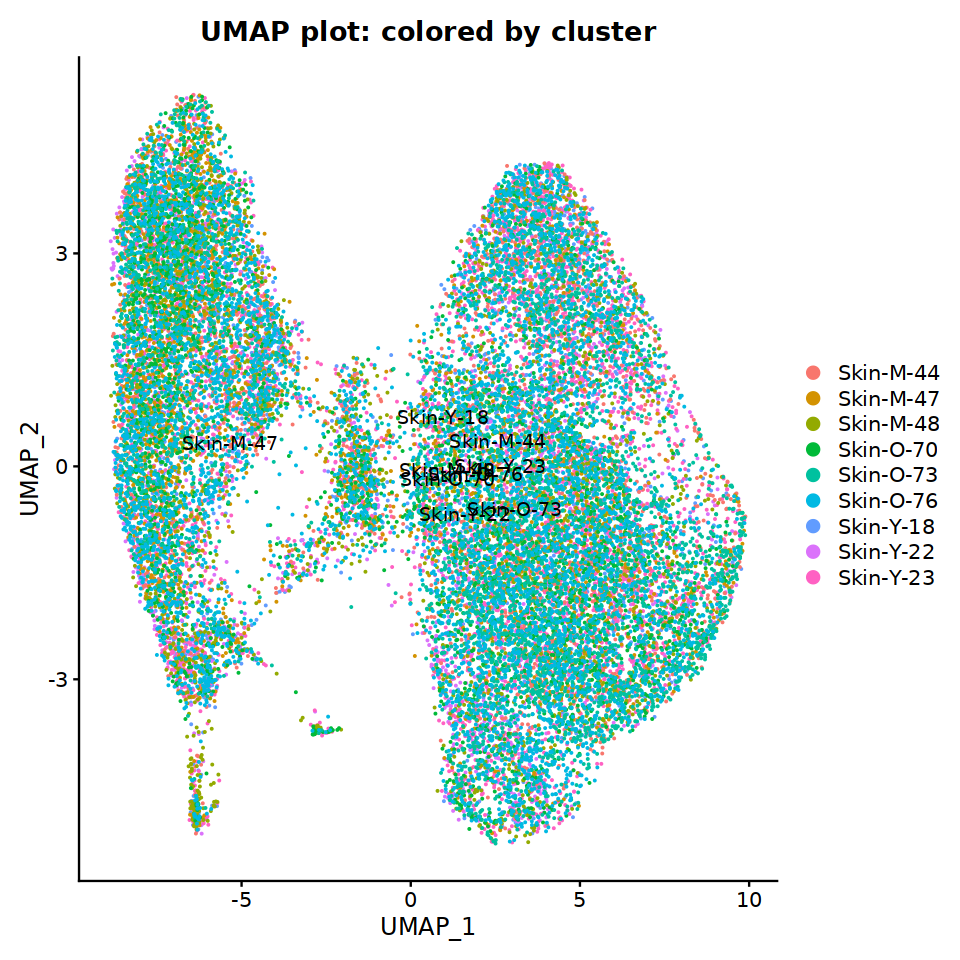

In [48]:
colors<-c("#4d648d", "#0450fb", "#11aac4", "#42e8f3", "#AEC7E8", "#2CA02C", "#98DF8A", "#9eccaf", "#daf400", "#983b59", "#e81f3f", "#ff8b94", "#ffd3b6", "#f9ae34", "#ffdb00", "#723584", "#9264eb", "#ff00ff", "#E377C2", "#de94e4", "#F7B6D2", "#C5B0D5", "#8C564B", "#C49C94", "#BCBD22", "#DBDB8D", "#7F7F7F", "#C7C7C7", "#a7a7b7", "#9999FF",  "#CC6633", "#990066", "#003333", "#996666","#CF6633")
DimPlot(scRNA.integrated, reduction = "umap", label = TRUE,group.by = 'group', repel = FALSE, cols=colors[1:length(unique(scRNA.integrated@active.ident))]) + NoLegend() + ggtitle("UMAP plot: colored by cluster")
DimPlot(scRNA.integrated, reduction = "umap", label = TRUE, cols=colors[1:length(unique(scRNA.integrated@active.ident))])
DimPlot(scRNA.integrated, reduction = "umap", label = TRUE,group.by = 'sample', repel = FALSE) + ggtitle("UMAP plot: colored by cluster")


In [49]:
saveRDS(scRNA.integrated, file = "subtype.harmony.rds")